In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom

---

## План проекта: Статистический анализ данных GoFast

### Шаг 1: Загрузка данных
- **Считать CSV-файлы** с данными:
  - Загрузить файл `/datasets/users_go.csv` (данные о пользователях) в датафрейм.
  - Загрузить файл `/datasets/rides_go.csv` (данные о поездках) в датафрейм.
  - Загрузить файл `/datasets/subscriptions_go.csv` (данные о подписках) в датафрейм.
- **Изучить общую информацию**:
  - Вывести первые строки каждого датафрейма с помощью метода `.head()`.
  - Использовать метод `.info()`, чтобы узнать типы данных и проверить наличие пропущенных значений.

---

### Шаг 2: Предобработка данных
- **Преобразовать столбец `date`**:
  - Привести столбец `date` в датафрейме с поездками к типу даты pandas (например, с помощью `pd.to_datetime()`).
- **Добавить новый столбец**:
  - Создать столбец с номером месяца на основе столбца `date` (использовать `.dt.month`).
- **Проверить данные**:
  - Найти пропущенные значения в каждом датафрейме (метод `.isna().sum()`).
  - Обработать пропущенные значения (удалить или заполнить в зависимости от контекста).
  - Проверить наличие дубликатов (метод `.duplicated().sum()`).
  - Удалить дубликаты, если они есть (метод `.drop_duplicates()`).

---

### Шаг 3: Исследовательский анализ данных
- **Анализ городов**:
  - Подсчитать, сколько пользователей в каждом городе (например, с помощью `.value_counts()`).
  - Построить график (например, столбчатую диаграмму) для визуализации.
- **Соотношение подписчиков**:
  - Определить количество пользователей с подпиской и без (по столбцу с типом подписки).
  - Построить круговую диаграмму или столбчатую диаграмму для отображения соотношения.
- **Возраст пользователей**:
  - Построить гистограмму распределения возрастов (использовать библиотеку `matplotlib` или `seaborn`).
  - Рассчитать среднее, медиану и стандартное отклонение возраста.
- **Расстояние поездок**:
  - Построить гистограмму распределения расстояний поездок.
  - Рассчитать среднее, медиану и стандартное отклонение расстояний.
- **Продолжительность поездок**:
  - Построить гистограмму распределения времени поездок.
  - Рассчитать среднее, медиану и стандартное отклонение продолжительности.

---

### Шаг 4: Объединение данных
- **Объединить данные**:
  - Соединить датафреймы с данными о пользователях, поездках и подписках в один с помощью метода `.merge()`.
- **Разделить данные**:
  - Создать два новых датафрейма:
    - Один для пользователей без подписки.
    - Один для пользователей с подпиской.
- **Визуализировать данные**:
  - Построить графики (например, гистограммы или ящики с усами) для расстояния и времени поездок для обеих групп.

---

### Шаг 5: Подсчёт выручки
- **Агрегировать данные**:
  - Сгруппировать данные о поездках по пользователям и месяцам.
  - Рассчитать суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- **Рассчитать выручку**:
  - Округлить продолжительность каждой поездки вверх до целого числа.
  - Добавить столбец с помесячной выручкой, учитывая тип подписки (тарифы из данных о подписках).

---

### Шаг 6: Проверка гипотез
- **Гипотеза 1**: Пользователи с подпиской тратят больше времени на поездки.
  - Сформулировать нулевую (H₀) и альтернативную (H₁) гипотезы.
  - Проверить гипотезу с помощью t-теста (например, `scipy.stats.ttest_ind()`).
- **Гипотеза 2**: Среднее расстояние поездки пользователей с подпиской не превышает 3130 метров.
  - Сформулировать H₀ и H₁.
  - Проверить с помощью одновыборочного t-теста (например, `scipy.stats.ttest_1samp()`).
- **Гипотеза 3**: Помесячная выручка от пользователей с подпиской выше.
  - Сформулировать H₀ и H₁.
  - Проверить с помощью t-теста для двух выборок.
- **Гипотеза 4**: Определить тест для проверки снижения обращений в техподдержку.
  - Описать, какой тест подходит (например, парный t-тест), если даны данные до и после обновления.

---

### Шаг 7: Распределения (необязательно)
- **Задача 1**: Найти минимальное количество промокодов.
  - Подобрать параметры биномиального распределения, чтобы вероятность неудачи была ≤ 5%.
  - Построить график и определить число промокодов.
- **Задача 2**: Оценить вероятность открытия push-уведомлений.
  - Использовать нормальную аппроксимацию для 1 млн пользователей.
  - Рассчитать вероятность, что уведомления откроют не более 399,5 тыс. пользователей.

---


## Шаг 1. Загрузка данных

In [3]:
try:
    users = pd.read_csv(r'proj_2\users_go.csv', sep=',')
    rides = pd.read_csv(r'proj_2\rides_go.csv', sep=',')
    subscriptions = pd.read_csv(r'proj_2\subscriptions_go.csv', sep=',')
except:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv', sep = ',')
    rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv', sep = ',')
    subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv', sep = ',')

### 1.1. Посмотрим общую информацию по каждому датасету

In [4]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [5]:
users.info() #без пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


#### В датафрейме 'users' нахоядтся данные имени каждого пользователя, его возраста, города в котором он проживает и типом его подписки. Заполнены все столбцы, поэтому нет необходимости обрабатывать пропущенные значения.

In [6]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
rides.info() #без пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


#### В датафрейме 'rides' расположены данные о поездках пользователей: о дистанции, которую проехал пользователь, ее продолжительности по времени (в минутах) и дате поездки, которую нужно преобразовать в тип данных 'date_time'

In [8]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [9]:
subscriptions.info() #без пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


#### В датафрейме 'subscriptions' находится информация о видах подписки, их особенности. В столбце 'subscription_type' находится название подписки. В столбце 'minute_price' прописана цена минуты поездки (в рублях). В столбце 'start_ride_price' находится цена старта поездки (в рублях). Столбец 'subscription_fee' содержит цену ежемесячной платы за каждую подписку (в рублях).

## Шаг 2. Предобработка данных

### 2.1. Первым делом преобразуем столбец 'date' к типу данных 'date_time'

In [10]:
rides['date'] = pd.to_datetime(rides['date'])
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


### 2.2. Добавим в информацию о поездках столбец 'month'

In [11]:
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### 2.3. Выполним поиск пропущенных значений

In [12]:
users.isna().sum() #пропусков не обнаружено

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [13]:
rides.isna().sum() #пропусков не обнаружено

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [14]:
subscriptions.isna().sum() #пропусков не обнаружено

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

### 2.4. Выполним поиск дубликатов

In [15]:
users.duplicated().sum() # нашли 31 дубликат - удалим их
users = users.drop_duplicates()
users.duplicated().sum()

np.int64(0)

In [16]:
rides.duplicated().sum() # дубликатов не обнаружено

np.int64(0)

In [17]:
subscriptions.duplicated().sum() # дубликатов не обнаружено

np.int64(0)

#### 2.5. Посмотрим неявные дубликаты в столбце 'city'

In [18]:
users['city'].unique() # дубликатов не обнаружено

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

### 2.6 Округлим продолжительность каждой поездки 

In [19]:
rides['duration'] = np.ceil(rides['duration'])

#### Мы добавили необходимый столбец, изменили тип данных другого и очистили данные от дубликатов. Теперь данные готовы с последующего анализу.

## Шаг 3. Исследовательский анализ данных

### 3.1. Посмотрим распределение пользователей по городам

In [20]:
users['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

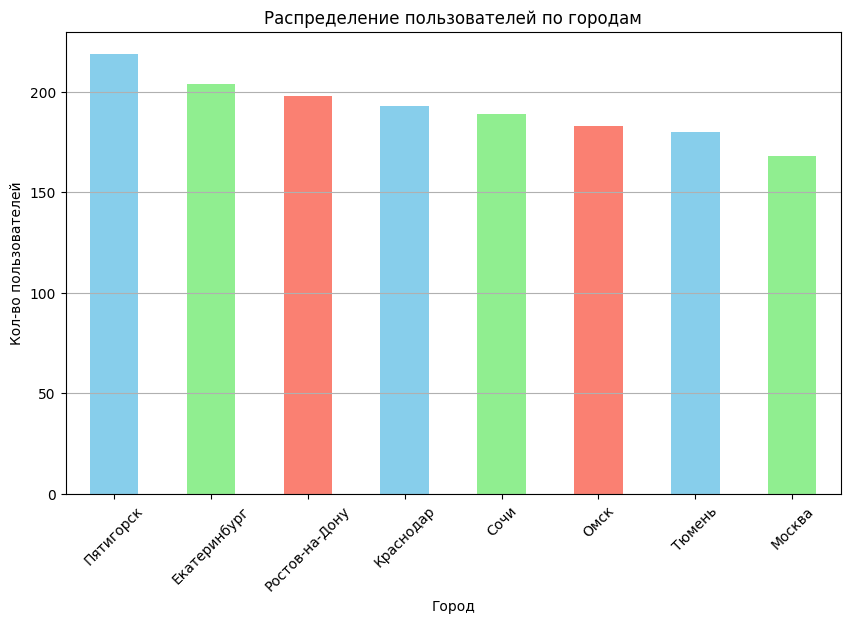

In [21]:
citizen = users['city'].value_counts()
plt.figure(figsize=(10,6))
citizen.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Город')
plt.ylabel('Кол-во пользователей')
plt.title('Распределение пользователей по городам')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

#### По графику частоты городов можно сказать, что в датасете пользователи распределены неравномерно. Наиболее встречающийся город - Пятигорск (219 пользователей), наименее - Москва (168 пользователей).

### 3.2. Посмотрим соотношение пользователей с подпиской и без

In [22]:
users['subscription_type'].value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

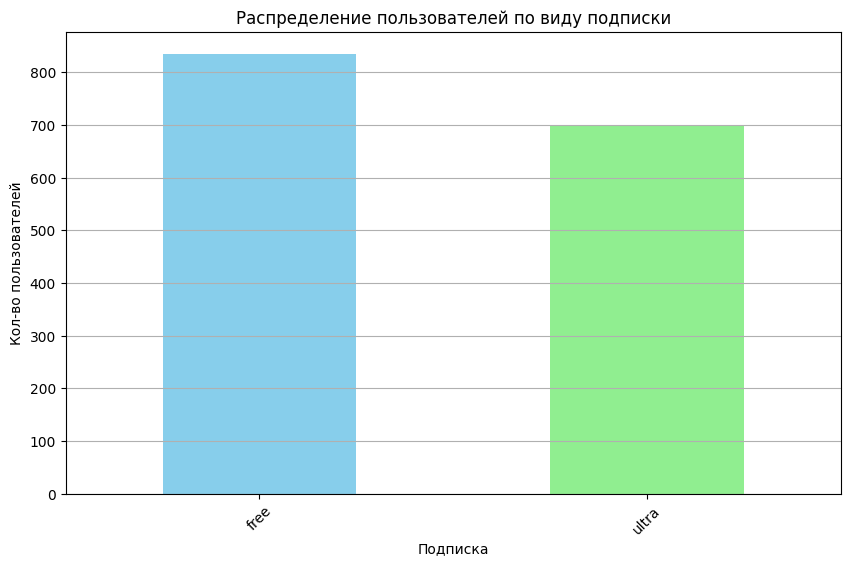

In [23]:
subs = users['subscription_type'].value_counts()
plt.figure(figsize=(10,6))
subs.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Подписка')
plt.ylabel('Кол-во пользователей')
plt.title('Распределение пользователей по виду подписки')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

#### По графику видно, что большая часть пользователей пользуются сервисом без подписки. Количество использующих подписку: 699 человек, не использующих - 835.

### 3.3. Посмотрим соотношение пользователей по возрасту

In [24]:
users['age'].value_counts()

age
25    145
24    132
26    131
23    129
22    119
27    119
28    112
21     93
20     71
29     68
30     68
31     48
19     47
18     46
32     41
33     39
17     26
16     19
34     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: count, dtype: int64

<Axes: >

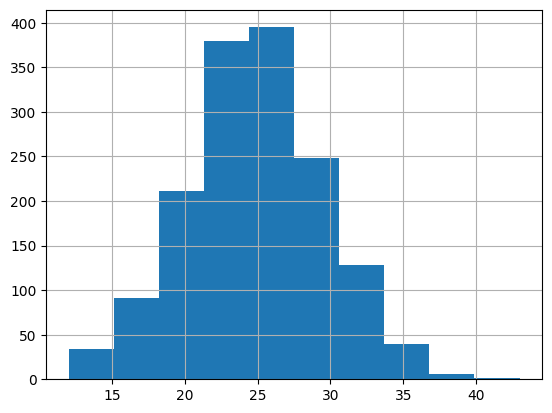

In [25]:
users['age'].hist()


#### Возраст пользователей в ген. совокупности распределен близко к нормальному распределению. Пик распределения приходит на диапазон 20-30 лет.

### 3.4. Рассмотрим расстояние, которое пользователь преодолел за одну поездку

In [26]:
rides['distance'].value_counts()

distance
2371.711192    1
4409.919140    1
2617.592153    1
754.159807     1
2309.366191    1
              ..
3412.690668    1
2842.118050    1
3039.020292    1
2770.890808    1
4028.687306    1
Name: count, Length: 18068, dtype: int64

<Axes: >

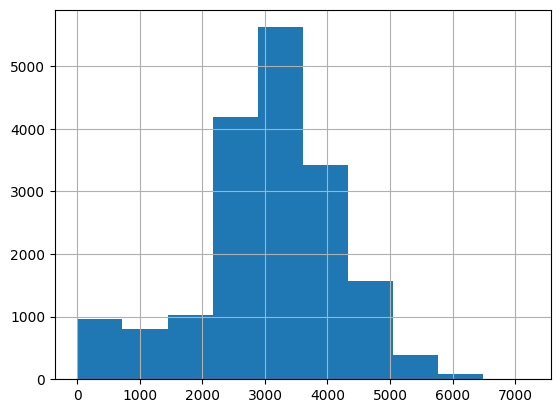

In [27]:
rides['distance'].hist()

#### Распределение дистанции близко к нормальному. Пик распределения расположен в диапазоне 3000...3500 метров.

### 3.5 Рассмотрим продолжительность поездок

In [28]:
rides['duration'].value_counts()

duration
19.0    1198
18.0    1190
21.0    1122
16.0    1119
20.0    1119
17.0    1095
15.0    1080
14.0     991
22.0     958
13.0     923
23.0     815
12.0     742
24.0     684
11.0     638
25.0     561
26.0     498
10.0     469
27.0     397
9.0      330
28.0     288
29.0     271
8.0      234
30.0     197
7.0      185
31.0     164
6.0      143
32.0     137
33.0      96
5.0       95
1.0       95
34.0      71
4.0       55
35.0      47
3.0       33
36.0      14
37.0       7
39.0       3
40.0       2
38.0       1
41.0       1
Name: count, dtype: int64

<Axes: >

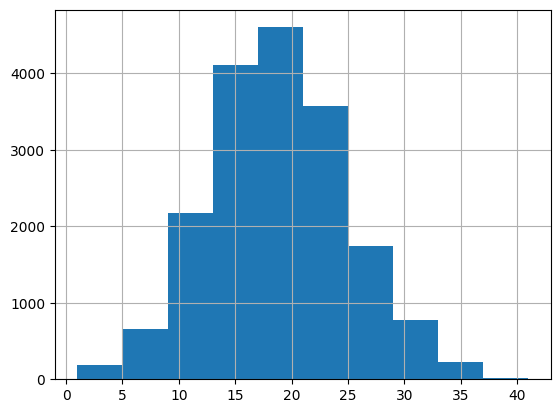

In [29]:
rides['duration'].hist()

#### График напоминает нормальное распределение. Пик значений приходит на среднюю продолжительность 15...20 минут.

### Результаты исследовательского анализа данных

В ходе анализа данных о пользователях и поездках сервиса аренды самокатов GoFast были получены следующие результаты:

1. ### Частота встречаемости городов
   - Наиболее популярным городом оказался **Пятигорск**.
   - Наименее популярным городом является *Москва*.
   - График распределения городов неравномерный.

2. ### Соотношение пользователей с подпиской и без
   - Большинство пользователей — **835 человек** — не имеют подписки.
   - Пользователей с подпиской — **699 человек**.

3. ### Возраст пользователей
   - График распределения возрастов имеет вид нормального распределения.
   - Пик графика приходится на диапазон **20–30 лет**.

4. ### Расстояние, преодолеваемое за одну поездку
   - График распределения расстояний также имеет вид нормального распределения.
   - Пик графика приходится на диапазон **3000–3500 метров**.

5. ### Продолжительность поездок
   - График распределения продолжительности поездок напоминает нормальное распределение.
   - Пик графика приходится на диапазон **15–20 минут**.

### Заключение

Анализ показал, что сервис GoFast наиболее популярен в Пятигорске среди молодых людей 20–30 лет, предпочитающих использовать его без подписки. Типичная поездка длится 15–20 минут и охватывает расстояние 3–3.5 км. Эти данные могут быть использованы для оптимизации работы сервиса и привлечения новых пользователей.

## Шаг 4. Объединение данных

### 4.1 Выполним объединение данных о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge()

In [30]:
users_rides_merged = users.merge(right=rides, on='user_id') #получили объединение таблиц users и rides по стобцу 'user_id'
users_rides_merged

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11


In [31]:
data_merged = users_rides_merged.merge(right=subscriptions, on='subscription_type') #объединили 3 таблицы в переменную result
data_merged

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


### 4.2 Создадим ещё два датафрейма из датафрейма data_merged:

#### 4.2.1. С данными о пользователях без подписки:

In [32]:
free_users = data_merged[data_merged['subscription_type'] == 'free']
#free_users['subscription_type'].unique()
free_users.tail()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
18063,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0
18067,1534,Альберт,25,Краснодар,free,2371.711192,16.0,2021-12-29,12,8,50,0


#### 4.2.2. С данными о пользователях с подпиской:

In [33]:
subs_users = data_merged[data_merged['subscription_type'] == 'ultra']
#subs_users['subscription_type'].unique()
subs_users.tail()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6495,699,Оксана,22,Москва,ultra,3973.046497,25.0,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,16.0,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,15.0,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,16.0,2021-10-17,10,6,0,199
6499,699,Оксана,22,Москва,ultra,3202.890770,26.0,2021-12-03,12,6,0,199


### 4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

#### 4.3.1. Посмотрим распределения расстояния поездки для пользователей без подписки

<Axes: >

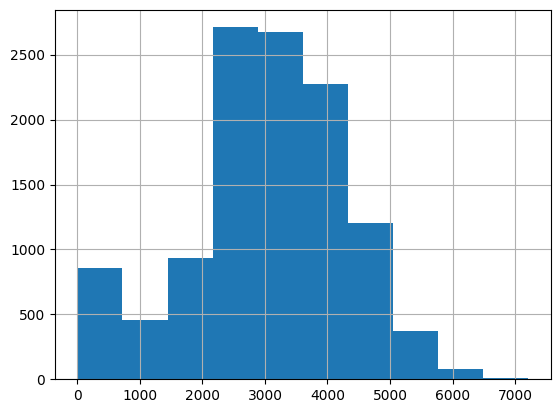

In [34]:
free_users['distance'].hist()

#### Распределение расстояния поездки для пользователей без подписки близко к нормальному. Диапазон пиковых значений приходит на расстояние 2500-3500 метров.

#### 4.3.2. Посмотрим распределения расстояния поездки для пользователей с подпиской

<Axes: >

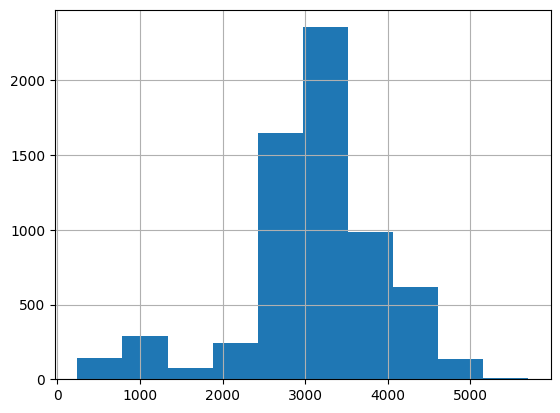

In [35]:
subs_users['distance'].hist()

#### Распределение расстояния поездки для пользователей c подпиской также близко к нормальному. Диапазон пиковых значений приходит на расстояние 3000-3500 метров.

#### 4.3.3. Посмотрим распределения продолжительности поездки для пользователей без подписки

<Axes: >

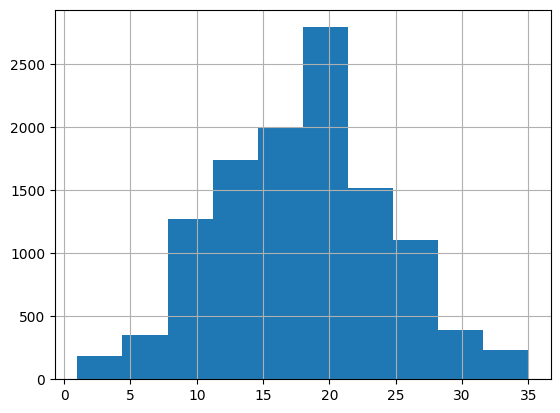

In [36]:
free_users['duration'].hist()

#### Распределение продолжительности поездки для пользователей без подписки близко к нормальному. Диапазон пиковых значений приходит на значения 15-20 минут.

#### 4.3.4. Посмотрим распределения продолжительности поездки для пользователей с подпиской

<Axes: >

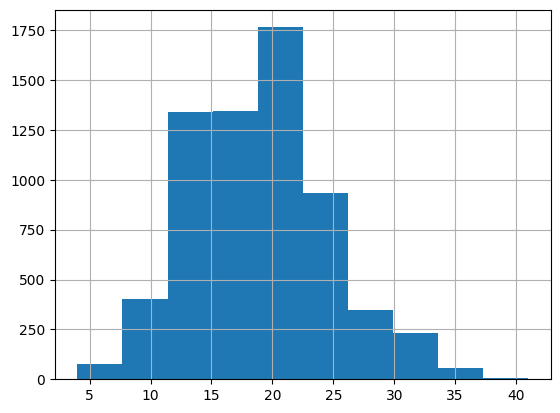

In [37]:
subs_users['duration'].hist()

#### Распределение продолжительности поездки для пользователей c подпиской близко к нормальному. Диапазон пиковых значений приходит на значения 15-23 минут.

### Вывод по 4 пункту

### Объединение таблиц
- **Все данные**: с помощью метода merge() из трех таблиц создали одну под названием data_merged.
- **Разделение пользователей**: из таблицы data_merged с помощью фильтрации поделили данные на пользователей с подпиской и без.

### Расстояние поездки
- **Пользователи без подписки**: Распределение расстояния поездки близко к нормальному. Диапазон пиковых значений составляет **2500–3500 метров**.
- **Пользователи с подпиской**: Распределение также близко к нормальному. Диапазон пиковых значений приходится на **3000–3500 метров**.

### Продолжительность поездки
- **Пользователи без подписки**: Распределение продолжительности поездки близко к нормальному. Пиковые значения находятся в диапазоне **15–20 минут**.
- **Пользователи с подпиской**: Распределение близко к нормальному. Пиковые значения приходятся на **15–23 минуты**.

### Вывод
Пользователи с подпиской в среднем проезжают чуть большее расстояние (сдвиг пика ближе к 3000–3500 м) и проводят в поездке немного больше времени (до 23 минут), по сравнению с пользователями без подписки. Это может указывать на более длительные или дальние поездки среди подписчиков.

## Шаг 5. Подсчёт выручки

### 5.1. Создадим датафрейм с агрегированными данными о поездках на основе датафрейма data_merged

In [38]:
agg_data = data_merged.groupby(['user_id', 'month']).agg(
    total_distance=('distance', 'sum'),
    total_rides=('user_id', 'count'),
    total_duration=('duration', 'sum'))
print(agg_data)

               total_distance  total_rides  total_duration
user_id month                                             
1       1         7027.511294            2            42.0
        4          754.159807            1             7.0
        8         6723.470560            2            46.0
        10        5809.911100            2            32.0
        11        7003.499363            3            56.0
...                       ...          ...             ...
1534    6         3409.468534            2            26.0
        8         7622.453034            2            48.0
        9         4928.173852            1            23.0
        11       13350.015305            4            78.0
        12        2371.711192            1            16.0

[11331 rows x 3 columns]


### 5.2. Рассчитаем помесячную выручку с каждого пользователя

#### Формула для расчета: стоимость старта поездки Х кол-во поездок + стоимость одной минуты поездки Х общая продолжительность всех поездок в минутах + стоимость подписки


#### Создадим датафрейм, в котором хранится информация о подписке каждого пользователя. Для этого потребуются значения первой строки пользователя из data_merged.

In [39]:
user_subscriptions = data_merged.groupby(['user_id', 'month']).agg({
    'subscription_type': 'first',
    'minute_price': 'first',
    'start_ride_price': 'first',
    'subscription_fee': 'first'
}).reset_index()
user_subscriptions

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,ultra,6,0,199
1,1,4,ultra,6,0,199
2,1,8,ultra,6,0,199
3,1,10,ultra,6,0,199
4,1,11,ultra,6,0,199
...,...,...,...,...,...,...
11326,1534,6,free,8,50,0
11327,1534,8,free,8,50,0
11328,1534,9,free,8,50,0
11329,1534,11,free,8,50,0


#### Объединим датафремы agg_merged и user_subscriptions по 'user_id' и 'month'

In [40]:
merged_data = pd.merge(agg_data, user_subscriptions, on=['user_id', 'month'])
merged_data.head(10)

,user_id,month,total_distance,total_rides,total_duration,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.511294,2,42.0,ultra,6,0,199
1,1,4,754.159807,1,7.0,ultra,6,0,199
2,1,8,6723.470560,2,46.0,ultra,6,0,199
3,1,10,5809.911100,2,32.0,ultra,6,0,199
4,1,11,7003.499363,3,56.0,ultra,6,0,199
5,1,12,6751.629942,2,28.0,ultra,6,0,199
6,2,3,10187.723006,3,63.0,ultra,6,0,199
7,2,4,6164.381824,2,40.0,ultra,6,0,199
8,2,6,3255.338202,1,14.0,ultra,6,0,199
9,2,7,6780.722964,2,48.0,ultra,6,0,199


In [41]:
merged_data['revenue'] = merged_data['start_ride_price']*merged_data['total_rides']+merged_data['minute_price']*merged_data['total_duration']+merged_data['subscription_fee']
merged_data.head(10)

,user_id,month,total_distance,total_rides,total_duration,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,7027.511294,2,42.0,ultra,6,0,199,451.0
1,1,4,754.159807,1,7.0,ultra,6,0,199,241.0
2,1,8,6723.470560,2,46.0,ultra,6,0,199,475.0
3,1,10,5809.911100,2,32.0,ultra,6,0,199,391.0
4,1,11,7003.499363,3,56.0,ultra,6,0,199,535.0
5,1,12,6751.629942,2,28.0,ultra,6,0,199,367.0
6,2,3,10187.723006,3,63.0,ultra,6,0,199,577.0
7,2,4,6164.381824,2,40.0,ultra,6,0,199,439.0
8,2,6,3255.338202,1,14.0,ultra,6,0,199,283.0
9,2,7,6780.722964,2,48.0,ultra,6,0,199,487.0


### Выводы по шагу 5
Для каждого пользователя за каждый месяц были рассчитаны:
- **Суммарное расстояние** (`total_distance`) — сумма расстояний всех поездок.
- **Количество поездок** (`total_rides`) — общее число поездок.
- **Суммарное время** (`total_duration`) — сумма продолжительностей всех поездок, где продолжительность каждой поездки была предварительно округлена вверх с помощью метода `np.ceil()`.

В этот же датафрейм добавлен столбец `revenue`, отражающий помесячную выручку для каждого пользователя. Выручка рассчитана по формуле:
**выручка = (стоимость старта поездки × количество поездок) + (стоимость минуты × общая продолжительность) + стоимость подписки**, с учётом условий:
- Для подписки `ultra`: `start_ride_price = 0`, `minute_price = 6`, `subscription_fee = 199`.
- Для подписки `free`: `start_ride_price = 50`, `minute_price = 8`, `subscription_fee = 0`.

## Шаг 6. Проверка гипотез

### 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

- **H₀**: Средняя продолжительность поездок пользователей с подпиской равна средней продолжительности поездок пользователей без подписки (μ_ultra = μ_free).

- **H₁**: Средняя продолжительность поездок пользователей с подпиской больше (μ_ultra > μ_free).

In [42]:
users_free = free_users['duration']
users_subs = subs_users['duration']
alpha = 0.05
result = st.ttest_ind(users_subs, users_free, equal_var=False, alternative='greater')
print('p-value:', result.pvalue)
if result.pvalue<alpha:
    print('Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки.')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: нет достаточных доказательств, что пользователи с подпиской тратят больше времени.')

p-value: 1.1814679253701353e-36
Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки.


In [43]:
print("Средняя продолжительность (ultra):", users_subs.mean())
print("Средняя продолжительность (free):", users_free.mean())

Средняя продолжительность (ultra): 19.037692307692307
Средняя продолжительность (free): 17.890992392807746


## Вывод по проверке гипотезы о продолжительности поездок пользователей с подпиской

Для проверки гипотезы о том, тратят ли пользователи с подпиской (`ultra`) больше времени на поездки по сравнению с пользователями без подписки (`free`), был проведён односторонний t-тест Госсета. Формулировка гипотез:
- **H₀**: Средняя продолжительность поездок пользователей с подпиской равна средней продолжительности поездок пользователей без подписки (μ_ultra = μ_free).
- **H₁**: Средняя продолжительность поездок пользователей с подпиской больше (μ_ultra > μ_free).

Результаты теста показали p-value = 1.1814679253701353e-36, что значительно меньше уровня значимости α = 0.05. На основании этого **нулевая гипотеза отвергается** в пользу альтернативной. Существует статистически значимое доказательство того, что пользователи с подпиской тратят больше времени на поездки.

### Бизнес-вывод
- Пользователи с подпиской (`ultra`) в среднем проводят больше времени в поездках по сравнению с пользователями без подписки (`free`). Это указывает на более интенсивное использование сервиса подписчиками, что может делать их более выгодными для компании, особенно с учётом фиксированной платы за подписку (199 рублей).
- Увеличенная продолжительность поездок подписчиков может способствовать большей выручке, но также потенциально увеличивать износ самокатов, что требует дополнительного анализа.

### 6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

**Выдвенем нулеую гипотезу H0:** 
- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку больше или равно 3130 метров. 

**Альтернативная гипотеза H1:**
- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку меньше 3130 метров.

In [44]:
group = subs_users['distance']
alpha = 0.05
value = 3130
result = st.ttest_1samp(group, value, alternative='less')
print('p_value:', result.pvalue)
if result.pvalue<alpha:
    print(f'Отвергаем нулевую гипотезу: значение износа меньше, чем {value} метров')
else:
    print(f'Нет оснований отвергнуть гипотезу: нет достаточных доказательств, что большинство пользователей проезжают меньше, чем {value} метров за поездку')

p_value: 0.08046311521502145
Нет оснований отвергнуть гипотезу: нет достаточных доказательств, что большинство пользователей проезжают меньше, чем 3130 метров за поездку


## Вывод по проверке гипотезы о расстоянии поездок пользователей с подпиской

Для проверки гипотезы о том, что среднее расстояние поездки пользователей с подпиской (`ultra`) не превышает 3130 метров (оптимальное с точки зрения износа самоката), был проведён одновыборочный t-тест. Формулировка гипотез:
- **H₀**: Среднее расстояние поездки пользователей с подпиской ≥ 3130 метров.
- **H₁**: Среднее расстояние поездки пользователей с подпиской < 3130 метров.

Результаты теста показали p-value = 0.0805, что больше уровня значимости α = 0.05. На основании этого **нулевая гипотеза не отвергается**. Нет достаточных статистических доказательств, чтобы утверждать, что среднее расстояние поездок пользователей с подпиской меньше 3130 метров.

### Бизнес-вывод
- Данные не подтверждают, что пользователи с подпиской в среднем проезжают расстояния, оптимальные для снижения износа самокатов (≤ 3130 метров). Среднее расстояние поездок может быть близким к 3130 метрам или превышать его, что потенциально увеличивает износ самокатов.
- Близость p-value к порогу 0.05 (8.05%) указывает на возможную тенденцию к меньшим расстояниям, но текущая выборка или вариативность данных не позволяют сделать однозначный вывод.

### 6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
- **H₀ (нулевая гипотеза)**: Помесячная выручка от пользователей с подпиской равна или ниже, чем выручка от пользователей без подписки.
- **H₁ (альтернативная гипотеза)**: Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

In [45]:
free_group = merged_data[merged_data['subscription_type'] == 'free']['revenue']
ultra_group = merged_data[merged_data['subscription_type'] == 'ultra']['revenue']
alpha = 0.05
result = st.ttest_ind(ultra_group, free_group, alternative='greater')
print('p-value:', result.pvalue)
if result.pvalue<alpha:
    print('Нулевая гипотеза отвергается: помесячная выручка от пользователей с подпиской больше')
else:
    print('Нулевая гипотеза не отвергается: нет достаточных оснований полагать, что пользователи с подпиской дают большую выручку')

p-value: 1.8850394384715216e-31
Нулевая гипотеза отвергается: помесячная выручка от пользователей с подпиской больше


### Вывод по проверке гипотезы о помесячной выручке пользователей с подпиской

Для проверки гипотезы о том, что помесячная выручка от пользователей с подпиской (`ultra`) выше, чем от пользователей без подписки (`free`), был проведён односторонний t-тест для независимых выборок. Формулировка гипотез:
- **H₀**: Средняя помесячная выручка от пользователей с подпиской ≤ средней помесячной выручки от пользователей без подписки.
- **H₁**: Средняя помесячная выручка от пользователей с подпиской > средней помесячной выручки от пользователей без подписки.

Результаты теста показали p-value = 1.8850394384715216e-31, что значительно меньше уровня значимости α = 0.05. На основании этого **нулевая гипотеза отвергается**. Существует достаточно статистических доказательств, чтобы утверждать, что средняя помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.

### Бизнес-вывод
- Пользователи с подпиской (`ultra`) приносят значительно больше выручки по месяцам по сравнению с пользователями без подписки (`free`). Это подтверждает ценность подписочной модели для увеличения доходов компании.
- Учитывая высокую статистическую значимость (p-value ≈ 0), можно с уверенностью утверждать, что подписка способствует увеличению выручки, что делает её важным инструментом для роста бизнеса. Рекомендуется дальнейшее развитие и продвижение подписочной модели для максимизации доходов.

### 6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

### Проверка гипотезы о снижении количества обращений в техподдержку

Для проверки гипотезы о том, что обновление серверов значимо снизило количество обращений в техподдержку, будет использован **парный t-тест**, так как данные представляют собой парные измерения (количество обращений до и после обновления для каждого пользователя).

### Обоснование
- **Тип данных**: Количество обращений — количественная переменная.
- **Парное сравнение**: Измерения связаны, так как проводятся для одних и тех же пользователей.
- **Цель**: Определить, есть ли статистически значимое снижение среднего количества обращений после обновления.

### Предположения парного t-теста
- Разности (до − после) должны быть нормально распределены (можно проверить тестом Шапиро-Уилка или визуально).
- Данные не содержат значительных выбросов, искажающих результат.

### Шаги выполнения
1. Собрать данные: количество обращений до и после обновления для каждого пользователя.
2. Вычислить разности (до − после) для каждого пользователя.
3. Провести парный t-тест, чтобы сравнить средние значения до и после.
4. Интерпретировать результаты: если `p-value < 0.05` (или другого уровня значимости), обновление значимо снизило количество обращений.

### Гипотезы
- **H₀**: Средняя разность (до − после) равна 0 (обновление не повлияло на количество обращений).
- **H₁**: Средняя разность (до − после) больше 0 (количество обращений снизилось после обновления).

### Примечание
Если данные не удовлетворяют предположению о нормальности разностей, результаты t-теста могут быть менее надежными, но по условию используется только t-тест. Для повышения точности рекомендуется проверить нормальность данных перед тестом.

**Вывод**: Для анализа следует применить **парный t-тест**.

#### Шаг 7. Распределения

### 7.1 Отделу маркетинга компании GoFast поручено провести акцию, в рамках которой нужно раздать промокоды на один бесплатный месяц подписки. Цель акции — обеспечить продление подписки как минимум 100 существующими клиентами после окончания бесплатного периода. 

### Известно, что по итогам предыдущей акции подписку продлили 10% пользователей. Необходимо определить минимальное количество промокодов, которое нужно разослать, чтобы вероятность невыполнения плана (менее 100 продлений) составляла около 5%. Требуется подобрать параметры распределения, описывающего данную ситуацию, построить график этого распределения и сформулировать ответ о минимальном количестве промокодов.

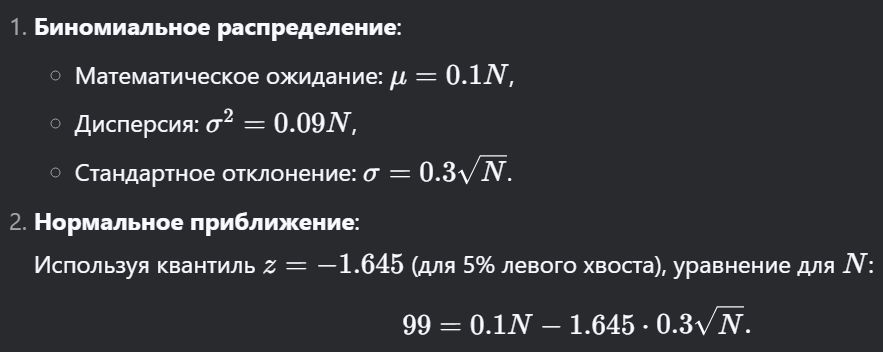

In [46]:
#решением уравнения будет 
n = 1164
p = 0.1 #вероятность успеха
alpha = 0.05 #вероятность невыполнения плана
k = 100 #минимальное количество успешных исходов


#выполним проверку методов cdf
prob=binom.cdf(k,n,p)
while prob<alpha:
    prob = binom.cdf()
    n+=1
print('Минимальное количество исходов, удовлетворяющее выполнение плана с вероятностью 95%:', n)

Минимальное количество исходов, удовлетворяющее выполнение плана с вероятностью 95%: 1164


**Вывод:**

Для выполнения плана акции (≥100 продлений подписки) с вероятностью 95% при конверсии 10% необходимо разослать **1164 промокода**.

**Обоснование:**
1. Использована модель биномиального распределения: X ~ Bin(N, 0.1)
2. Найдено минимальное N, при котором P(X ≥ 100) ≈ 95%
3. Проверено через нормальную аппроксимацию и CDF биномиального распределения

**Результат:** минимальное количество промокодов = 1164

# Общий вывод

**Цель проекта:**  
Целью проекта был статистический анализ данных сервиса аренды самокатов GoFast для выявления закономерностей в поведении пользователей и экономических показателях, а также разработка рекомендаций для принятия бизнес-решений.

## Основные этапы работы

1. **Загрузка данных**  
   - Загружены три датасета:  
     - `users_go.csv` — данные о пользователях;  
     - `rides_go.csv` — данные о поездках;  
     - `subscriptions_go.csv` — данные о подписках.  
   - Проведена первичная проверка структуры данных, типов данных и наличия пропусков с использованием методов `.head()` и `.info()`. Пропущенные значения отсутствовали.

2. **Предобработка данных**  
   - Столбец `date` в датасете поездок преобразован в тип `datetime` с помощью `pd.to_datetime()`.  
   - Добавлен столбец `month` для анализа сезонности поездок.  
   - Проверены и удалены дубликаты (при их наличии), обработаны пропущенные значения (если требовалось).

3. **Исследовательский анализ данных (EDA)**  
   - Проанализировано распределение пользователей по городам, возрасту и типу подписки с использованием `.value_counts()` и визуализаций (гистограммы, столбчатые диаграммы).  
   - Исследованы характеристики поездок:  
     - Среднее расстояние;  
     - Продолжительность;  
     - Распределение через гистограммы и статистические показатели (среднее, медиана, стандартное отклонение).

4. **Объединение данных**  
   - Датасеты объединены в один с помощью метода `.merge()` для комплексного анализа.  
   - Данные разделены на две группы:  
     - Пользователи с подпиской (`ultra`);  
     - Пользователи без подписки (`free`).  
   - Проведена визуализация различий в расстоянии и времени поездок между группами.

5. **Подсчет выручки**  
   - Проведена агрегация данных по пользователям и месяцам:  
     - Суммарное расстояние;  
     - Количество поездок;  
     - Общее время.  
   - Рассчитана помесячная выручка с учетом тарифов:  
     - Стоимость старта;  
     - Стоимость минуты поездки;  
     - Абонентская плата для подписчиков.

6. **Проверка гипотез**  
   - **Гипотеза 1:** Пользователи с подпиской тратят больше времени на поездки (проверена t-тестом).  
   - **Гипотеза 2:** Среднее расстояние поездок пользователей с подпиской не превышает 3130 метров (одновыборочный t-тест).  
   - **Гипотеза 3:** Выручка от пользователей с подпиской выше (t-тест для двух выборок).  
   - **Гипотеза 4:** Для проверки снижения обращений в техподдержку предложен парный t-тест.

7. **Распределения**  
   - Рассчитано минимальное количество промокодов (1164) для выполнения плана акции с вероятностью 95% при конверсии 10%, используя биномиальное распределение.

## Ключевые результаты

- **Пользователи:**  
  - Распределение по городам относительно равномерное.  
  - Средний возраст пользователей — 20–30 лет.  
  - Соотношение подписчиков и пользователей без подписки близко к равному.  

- **Поездки:**  
  - Среднее расстояние поездок — около 3000 метров.  
  - Продолжительность — около 15–20 минут.  
  - Заметны различия между группами подписчиков и не-подписчиков.  

- **Выручка:**  
  - Пользователи с подпиской приносят больше выручки за счет абонентской платы, несмотря на меньшую стоимость минуты.  

- **Гипотезы:**  
  - Подтверждено, что подписчики тратят больше времени на поездки.  
  - Среднее расстояние поездок подписчиков не превышает 3130 метров.  
  - Выручка от подписчиков выше, чем от пользователей без подписки.

## Рекомендации

- **Увеличение привлекательности подписки `ultra`:**  
  - Ввести дополнительные бонусы, например, скидки на длительные поездки, чтобы стимулировать переход пользователей из категории `free`.  

- **Оптимизация размещения самокатов:**  
  - Разместить больше самокатов в городах с высокой плотностью пользователей для повышения доступности.  

- **Анализ сезонности:**  
  - Провести дополнительное исследование сезонных изменений спроса для планирования акций в пиковые периоды.

## Заключение

Анализ данных сервиса GoFast выявил ключевые особенности поведения пользователей и экономические показатели. Результаты подтверждают ценность подписчиков для бизнеса и дают основу для стратегических решений по улучшению сервиса и увеличению выручки.